In [1]:
# Please refer here for more info: https://docs.openbb.co/sdk/usage/intros/portfolio

import os
import pandas
from openbb_terminal.sdk import openbb
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

In [3]:
# settings to locate excel path
dirname = os.path.dirname
__file__ = os.path.abspath('')

# locate and define excel path
excel_file_path = os.path.join(dirname(dirname(__file__)),"input/portfolio_data.xlsx") # change to your input excel path
benchmark_symbol = "0820EA.KL" # change the benchmark you want, for example SPY

In [4]:
# check transactions 
transactions_df = pandas.read_excel(excel_file_path)
transactions_df.head()

,Date,Ticker,Type,Sector,Industry,Country,Region,Price,Quantity,Fees,Premium,Investment,Side,Currency
0,2020-10-14 00:00:00,1066.KL,Stock,-,-,-,-,4.54,200,10,0,918.0,buy,MYR
1,2020-11-18 00:00:00,0151.KL,Stock,-,-,-,-,1.66,200,20,0,352.0,buy,MYR
2,2020-11-13 00:00:00,7148.KL,Stock,-,-,-,-,4.02,100,10,0,412.0,buy,MYR
3,6 Nov 2020,0093.KL,Stock,-,-,-,-,0.73,100,10,0,83.0,buy,MYR
4,2020-11-23 00:00:00,7022.KL,Stock,-,-,-,-,2.90,200,10,0,590.0,buy,MYR


In [5]:
# create Portfolio instance
p = openbb.portfolio.load(transactions_file_path = excel_file_path)
p.set_benchmark(benchmark_symbol) # set benchmark

True

In [6]:
openbb.portfolio.summary(p)

,Portfolio,Benchmark,Difference
Volatility,1.50%,0.73%,0.77%
Skew,-4.777292,0.411653,-5.188945
Kurtosis,71.746976,14.680656,57.066321
Maximum Drawdown,-30.73%,-13.88%,-16.85%
Sharpe ratio,-0.015556,0.012213,-0.027769
Sortino ratio,-0.015758,0.015053,-0.030811
R2 Score,-14.56%,-14.56%,0.00%


<Axes: title={'left': 'daily returns'}, xlabel='date'>

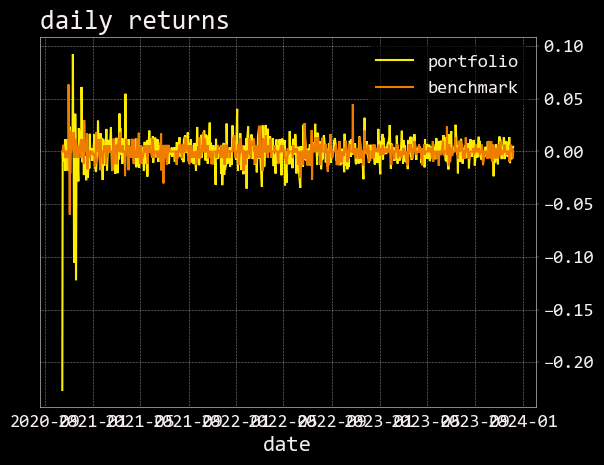

In [7]:
daily_returns = openbb.portfolio.dret(p)
daily_returns.reset_index().rename(columns={"index":"date"}).\
    plot(x="date", y=["portfolio","benchmark"], title="daily returns")


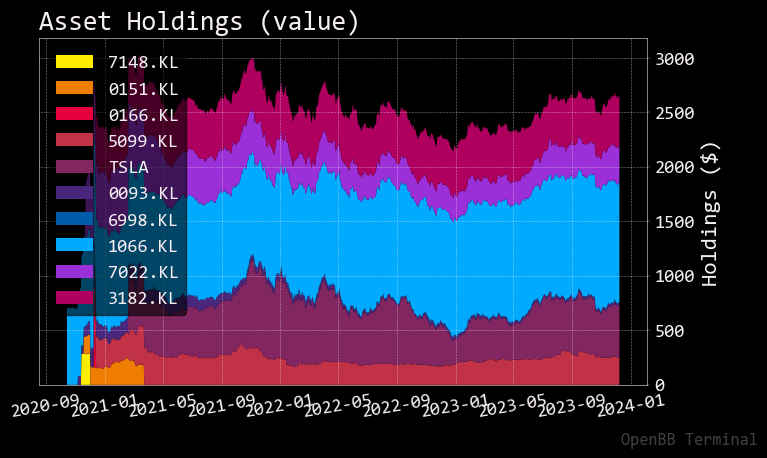

In [8]:
openbb.portfolio.holdv_chart(p)

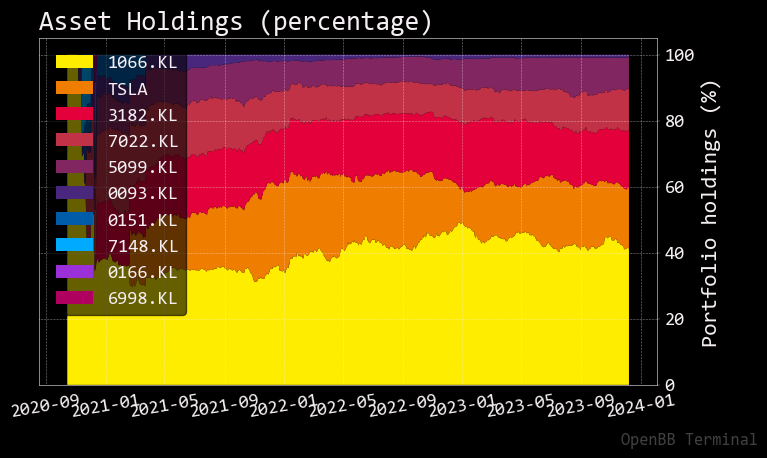

In [9]:
# Holdings of Assets as a %
openbb.portfolio.holdp_chart(p)